In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [415]:
df=pd.read_csv(r"C:\Users\tushar\Desktop\data science\datasets\h1n1_vaccine_prediction.csv")
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [416]:
df.race.unique()
df.shape

(26707, 34)

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [418]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [419]:
desc_sats=df.describe()
dec_column_list=desc_sats.columns.tolist()
dec_column_list
desc_sats.shape

(8, 25)

In [420]:
singlevaluecollist=[]
for col in dec_column_list:
    min_value=df[col].min()
    max_value=df[col].max()
    std_value=df[col].std()
    if (min_value==max_value):
        print('single value')
        singlevaluecollist.append(col)

In [421]:
df=df.drop(['census_msa','unique_id'],axis=1)

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [423]:
filtered_cols=df.columns
len(filtered_cols)

32

In [424]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100 #converting null values percentage

has_health_insur             45.957989
income_level                 16.561201
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
housing_status                7.645936
employment                    5.477965
marital_status                5.272026
qualification                 5.268282
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
sick_from_seas_vacc           2.010709
is_seas_risky                 1.924589
is_seas_vacc_effective        1.729884
sick_from_h1n1_vacc           1.479013
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
no_of_adults                  0.932340
no_of_children                0.932340
contact_avoidance             0.778822
avoid_touch_face              0.479275
h1n1_awareness                0.434343
h1n1_worry                    0.344479
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
antiviral_medication     

In [425]:
# missing value imputaion
# collect the columns to be imputed
# split into numeric and non muneric
# for numeric fill with mean
# for non numeric fill with mod
num_cols = []
nonnum_cols = []

for col in filtered_cols:
    if df[col].dtype == np.int64 or df[col].dtype == np.float64:
        num_cols.append(col)
    else:
        nonnum_cols.append(col)

print("Numeric columns:", num_cols)
print("Non-numeric columns:", nonnum_cols)


Numeric columns: ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children', 'h1n1_vaccine']
Non-numeric columns: ['age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment']


In [426]:
len(num_cols)

24

In [427]:
df[num_cols].describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [428]:
df.isnull().sum().sort_values(ascending=False)

has_health_insur             12274
income_level                  4423
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
housing_status                2042
employment                    1463
marital_status                1408
qualification                 1407
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
sick_from_seas_vacc            537
is_seas_risky                  514
is_seas_vacc_effective         462
sick_from_h1n1_vacc            395
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
no_of_adults                   249
no_of_children                 249
contact_avoidance              208
avoid_touch_face               128
h1n1_awareness                 116
h1n1_worry                      92
avoid_large_gatherings          87
reduced_outside_home_cont       82
antiviral_medication            71
wash_hands_frequently           42
bought_face_mask                19
race                

In [429]:
df[num_cols].isnull().sum().sort_values(ascending=False)

has_health_insur             12274
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
sick_from_seas_vacc            537
is_seas_risky                  514
is_seas_vacc_effective         462
sick_from_h1n1_vacc            395
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
no_of_adults                   249
no_of_children                 249
contact_avoidance              208
avoid_touch_face               128
h1n1_awareness                 116
h1n1_worry                      92
avoid_large_gatherings          87
reduced_outside_home_cont       82
antiviral_medication            71
wash_hands_frequently           42
bought_face_mask                19
h1n1_vaccine                     0
dtype: int64

In [430]:
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

In [431]:
df[num_cols].isnull().sum().sort_values(ascending=False)

h1n1_worry                   0
h1n1_awareness               0
no_of_children               0
no_of_adults                 0
sick_from_seas_vacc          0
is_seas_risky                0
is_seas_vacc_effective       0
sick_from_h1n1_vacc          0
is_h1n1_risky                0
is_h1n1_vacc_effective       0
has_health_insur             0
is_health_worker             0
cont_child_undr_6_mnths      0
chronic_medic_condition      0
dr_recc_seasonal_vacc        0
dr_recc_h1n1_vacc            0
avoid_touch_face             0
reduced_outside_home_cont    0
avoid_large_gatherings       0
wash_hands_frequently        0
bought_face_mask             0
contact_avoidance            0
antiviral_medication         0
h1n1_vaccine                 0
dtype: int64

In [432]:
df[nonnum_cols].isnull().sum().sort_values(ascending=False)

income_level      4423
housing_status    2042
employment        1463
marital_status    1408
qualification     1407
age_bracket          0
race                 0
sex                  0
dtype: int64

In [433]:
for col in nonnum_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

In [434]:
df[nonnum_cols].isnull().sum()

age_bracket       0
qualification     0
race              0
sex               0
income_level      0
marital_status    0
housing_status    0
employment        0
dtype: int64

In [435]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [436]:
# Data transformation-transforminf values into smaller values
# this is done when independent variables are in diffrent units and sizes
# nad the algorithm has a bias

In [437]:
# dummy variable encoding
# get_dummies for independent variables 
# label encoding for dependent variables

In [438]:
colstobedummied=df.select_dtypes(include=['object','category']).columns.tolist()

In [439]:
print(colstobedummied)

['age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment']


In [440]:
import copy
for col in colstobedummied:
    dummy_value=pd.get_dummies(df[col])
    df=pd.concat([df,dummy_value],axis=1)
vaccdf_for_Grouping = df.copy()

In [441]:
vaccdf_for_Grouping.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'no_of_adults', 'no_of_children', 'h1n1_vaccine',
       '18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years',
       '65+ Years', '12 Years', '< 12 Years', 'College Graduate',
       'Some College', 'Black', 'Hispanic', 'Other or Multiple', 'White',
       'Female', 'Male', '<= $75,000, Above Poverty', '> $75,000',
       'Below Po

In [442]:
le=LabelEncoder()
df['h1n1_vaccine']=le.fit_transform(df['h1n1_vaccine'])

In [443]:
x=df.drop(columns='h1n1_vaccine')
y=df['h1n1_vaccine']

In [444]:
x

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,"<= $75,000, Above Poverty","> $75,000",Below Poverty,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,True,False,True,True,False,False,True,False
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,True,False,True,False,True,True,False,False
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,True,True,False,True,False,False
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,False,True,False,True,False,True,False,True,False
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,True,False,False,False,True,True,False,False,True,False
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,True,False,False,False,True,False,True,True,False,False
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,True,False,False,False,True,True,False,True,False,False
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,True,False,False,True,False,False,True,True,False,False


In [445]:
x.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [446]:
x.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'no_of_adults', 'no_of_children', '18 - 34 Years',
       '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years',
       '12 Years', '< 12 Years', 'College Graduate', 'Some College', 'Black',
       'Hispanic', 'Other or Multiple', 'White', 'Female', 'Male',
       '<= $75,000, Above Poverty', '> $75,000', 'Below Poverty', 'Married',
    

In [447]:
non_numeric_columns

Index(['qualification', 'race', 'sex', 'income_level', 'marital_status',
       'housing_status', 'employment', '18 - 34 Years', '35 - 44 Years',
       '45 - 54 Years', '55 - 64 Years', '65+ Years', '12 Years', '< 12 Years',
       'College Graduate', 'Some College', 'Black', 'Hispanic',
       'Other or Multiple', 'White', 'Female', 'Male',
       '<= $75,000, Above Poverty', '> $75,000', 'Below Poverty', 'Married',
       'Not Married', 'Own', 'Rent', 'Employed', 'Not in Labor Force',
       'Unemployed'],
      dtype='object')

In [448]:
# Check data types of each column
non_numeric_columns = x.select_dtypes(exclude=[float, int]).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', '18 - 34 Years',
       '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years',
       '12 Years', '< 12 Years', 'College Graduate', 'Some College', 'Black',
       'Hispanic', 'Other or Multiple', 'White', 'Female', 'Male',
       '<= $75,000, Above Poverty', '> $75,000', 'Below Poverty', 'Married',
       'Not Married', 'Own', 'Rent', 'Employed', 'Not in Labor Force',
       'Unemployed'],
      dtype='object')


In [449]:
# Coerce any non-numeric values to NaN, then fill NaNs with a placeholder (e.g., 0)
x = x.apply(pd.to_numeric, errors='coerce').fillna(0)


In [487]:
x.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                  float64
qualification                float64
race                         float64
sex                          float64
income_level                 float64
marital_status               float64
h

In [489]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [491]:
x

array([[-0.68184881, -2.04427905, -0.22629268, ..., -1.13392038,
         1.26901527, -0.23986546],
       [ 1.51837305,  1.19702709, -0.22629268, ...,  0.88189614,
        -0.78801258, -0.23986546],
       [-0.68184881, -0.42362598, -0.22629268, ...,  0.88189614,
        -0.78801258, -0.23986546],
       ...,
       [ 0.41826212,  1.19702709, -0.22629268, ...,  0.88189614,
        -0.78801258, -0.23986546],
       [-0.68184881, -0.42362598, -0.22629268, ...,  0.88189614,
        -0.78801258, -0.23986546],
       [-1.78195974, -2.04427905, -0.22629268, ..., -1.13392038,
         1.26901527, -0.23986546]])

In [493]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [495]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [497]:
log.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [501]:
score_train=log.score(x_train,y_train)
score_train

0.8343318711886166

In [503]:
score_test=log.score(x_test,y_test)
score_test

0.8392612005491077

In [509]:
y_pred=log.predict(x_test)
y_pred.shape

(8013,)

In [511]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[5970,  329],
       [ 959,  755]], dtype=int64)

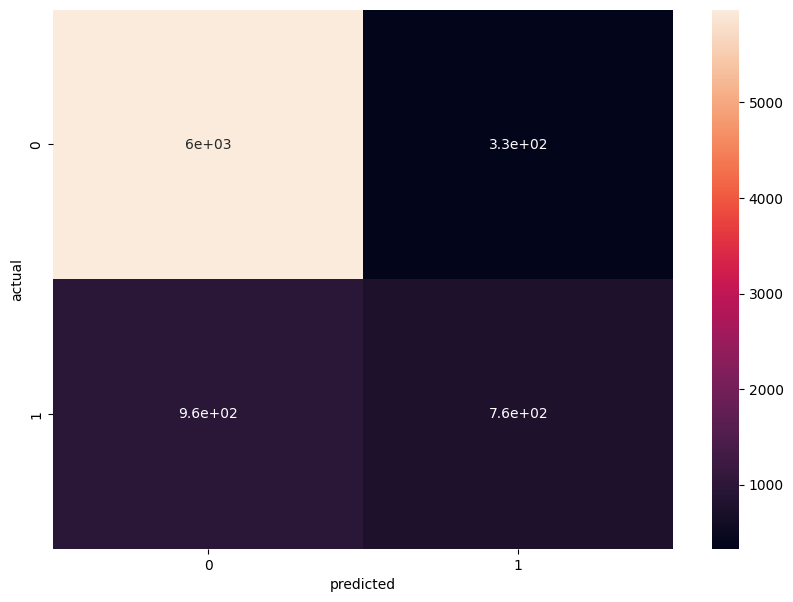

In [517]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show(1)

In [527]:
pd.crosstab(y_test,y_pred)

col_0,0,1
h1n1_vaccine,,
0,5970,329
1,959,755


In [525]:
vaccdf_for_Grouping['h1n1_vaccine_pred'] = log.predict(x)

In [541]:
columns_to_select=['h1n1_vaccine','h1n1_vaccine_pred']
rows_to_select=[1,2,3,4,5,6,7,8,9,10]
selected_data=vaccdf_for_Grouping.loc[rows_to_select,columns_to_select]
selected_data

,h1n1_vaccine,h1n1_vaccine_pred
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0
10,1,0


##### Group by Age and take average of h1n1_vaccine and h1n1_vaccine_prediction

In [568]:
vaccdf_group_age=vaccdf_for_Grouping.groupby('age_bracket').agg({'h1n1_vaccine':"mean",'h1n1_vaccine_pred':"mean"}).reset_index()
vaccdf_group_age

,age_bracket,h1n1_vaccine,h1n1_vaccine_pred
0,18 - 34 Years,0.190029,0.103931
1,35 - 44 Years,0.197765,0.116164
2,45 - 54 Years,0.194731,0.122375
3,55 - 64 Years,0.242855,0.162143
4,65+ Years,0.226655,0.135175


In [548]:
selected_data.mean()

h1n1_vaccine         0.2
h1n1_vaccine_pred    0.1
dtype: float64

In [613]:
dashboard_chart_colors =['red','green']

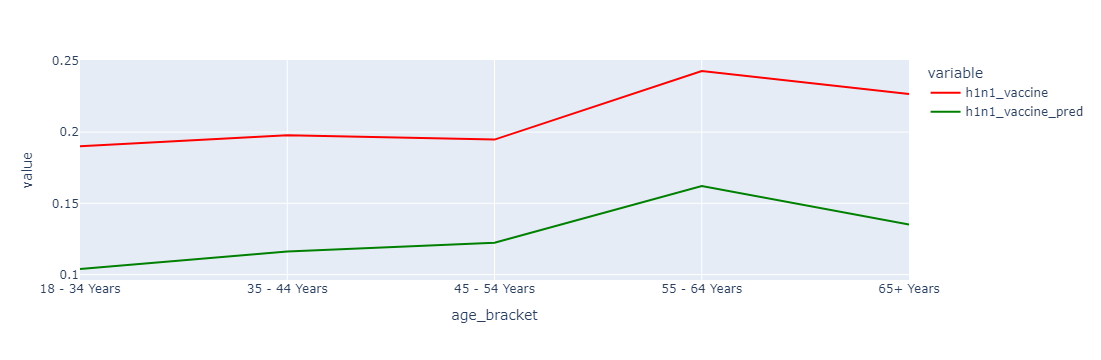

In [615]:
fig=px.line(vaccdf_group_age,x="age_bracket",y=['h1n1_vaccine','h1n1_vaccine_pred'],color_discrete_sequence=dashboard_chart_colors)
fig.show()

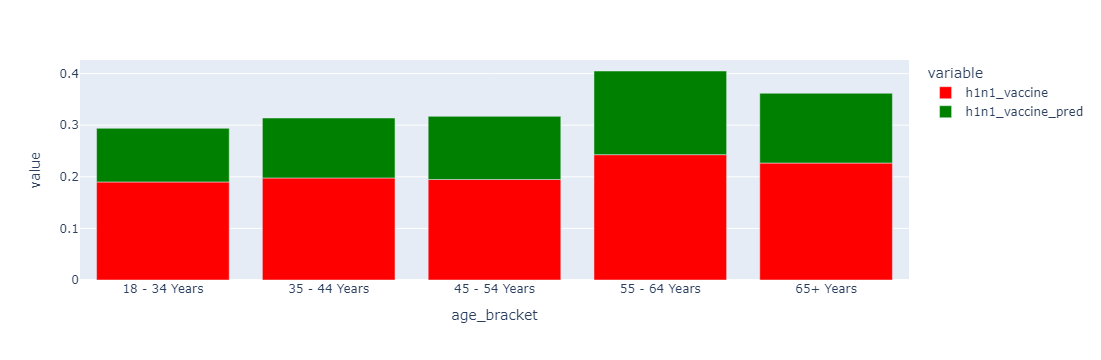

In [617]:
fig=px.bar(vaccdf_group_age,x="age_bracket", y=['h1n1_vaccine','h1n1_vaccine_pred'], 
           color_discrete_sequence=dashboard_chart_colors)
fig.show()

#### Group by Income Level and take average of h1n1_vaccine and h1n1_vaccine_prediction

In [620]:
vaccdf_group_income=vaccdf_for_Grouping.groupby('income_level').agg({'h1n1_vaccine':"mean",'h1n1_vaccine_pred':"mean"}).reset_index()
vaccdf_group_income

,income_level,h1n1_vaccine,h1n1_vaccine_pred
0,"<= $75,000, Above Poverty",0.199709,0.113721
1,"> $75,000",0.253010,0.173862
2,Below Poverty,0.191324,0.117538


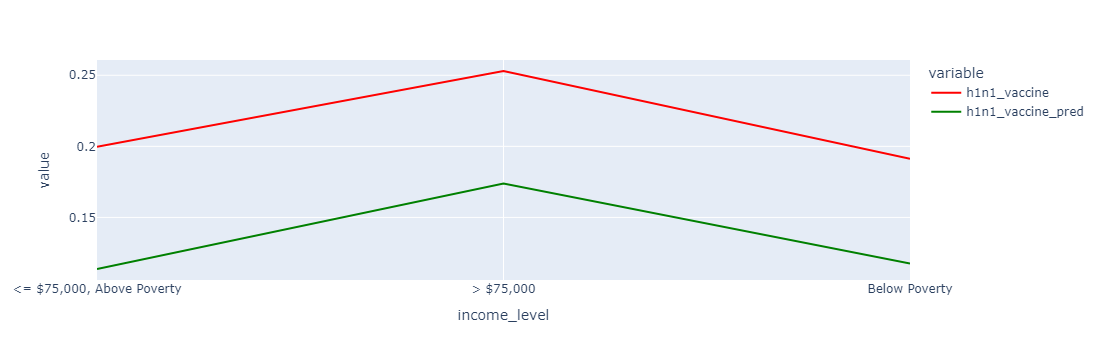

In [622]:
fig=px.line(vaccdf_group_income,x="income_level",y=['h1n1_vaccine','h1n1_vaccine_pred'],color_discrete_sequence=dashboard_chart_colors)
fig.show()

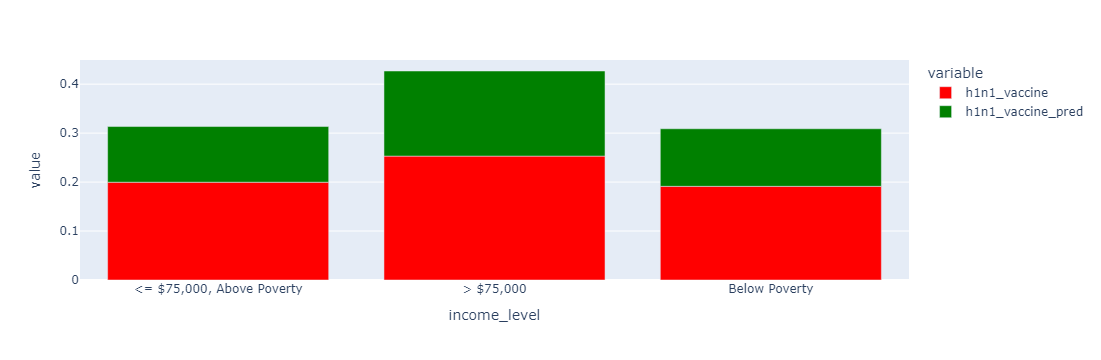

In [629]:
fig=px.bar(vaccdf_group_income,x="income_level", y=['h1n1_vaccine','h1n1_vaccine_pred'], 
           color_discrete_sequence=dashboard_chart_colors)
fig.show()

#### Group by gender and take average of h1n1_vaccine and h1n1_vaccine_prediction

In [638]:
vaccdf_group_gender=vaccdf_for_Grouping.groupby('sex').agg({'h1n1_vaccine':"mean",'h1n1_vaccine_pred':"mean"}).reset_index()
vaccdf_group_gender

,sex,h1n1_vaccine,h1n1_vaccine_pred
0,Female,0.219448,0.140119
1,Male,0.202231,0.113835


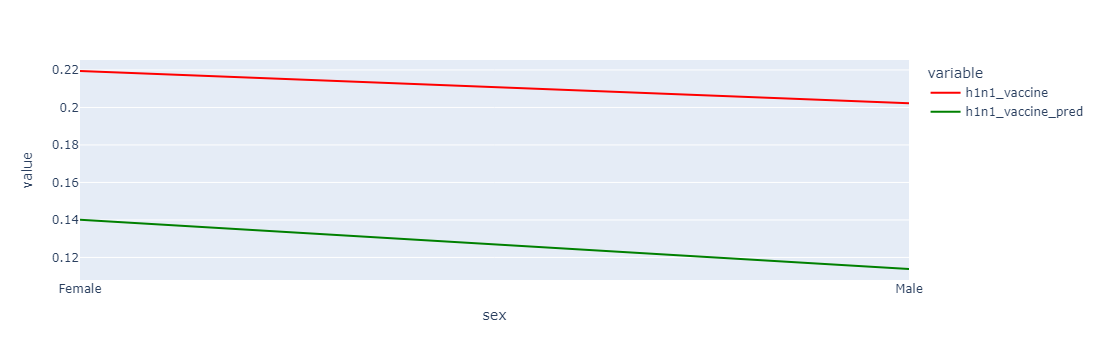

In [644]:
fig=px.line(vaccdf_group_gender,x="sex",y=['h1n1_vaccine','h1n1_vaccine_pred'],color_discrete_sequence=dashboard_chart_colors)
fig.show()

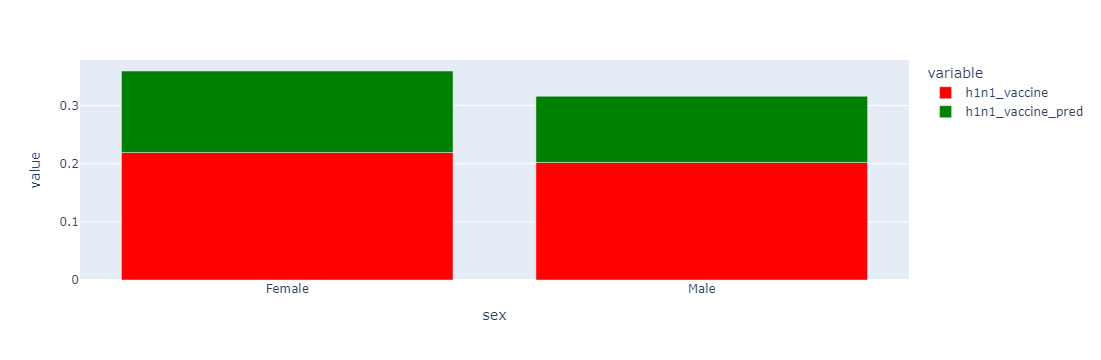

In [646]:
fig=px.bar(vaccdf_group_gender,x="sex",y=['h1n1_vaccine','h1n1_vaccine_pred'],color_discrete_sequence=dashboard_chart_colors)
fig.show()